In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [45]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 5
import numpy as np
np.random.seed(0)
from pyha import *
import scipy
from scipy import signal
import os
import inspect

import warnings
warnings.filterwarnings('ignore') # because they include system path -> fails unit tests on different computer

simulations = ['MODEL', 'PYHA']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Application

In [46]:
from pyha.cores import Spectrogram
from pyha.cores.util import *
plt.rcParams['figure.figsize'] = 15, 5

In [47]:
fft_size = 1024

In [44]:
from pyha.cores import BitreversalFFTshiftAVGPool
file = os.path.dirname(inspect.getfile(BitreversalFFTshiftAVGPool)) + '/phantom3_low_power_bladerf.npy'
orig_inp = np.load(file) # IQ samples
orig_inp = orig_inp[:int(len(orig_inp)/fft_size)*fft_size]
orig_inp *= 128

## Spectrogram

In [30]:
dut = Spectrogram(fft_size, avg_freq_axis=2, avg_time_axis=1)
sims = simulate(dut, orig_inp, simulations=simulations)

INFO:sim:Converting model to hardware types ...
INFO:sim:Enabled fast simulation (model cannot be converted to VHDL)
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Converting simulation inputs to hardware types...
INFO:sim:Running "PYHA" simulation...


100%|██████████| 141346/141346 [02:00<00:00, 1169.49it/s]

INFO:sim:OK!
INFO:sim:Simulations completed!


In [20]:
print(f"SNR: {snr(sims['MODEL'], sims['PYHA']):.2f}")
imshow(sims['PYHA'].T)

18.739903270399353

## Use `avg_freq_axis` and  `avg_time_axis` to control average pooling

In [31]:
dut = Spectrogram(fft_size, avg_freq_axis=8, avg_time_axis=4)
sims = simulate(dut, orig_inp, simulations=simulations)

INFO:sim:Converting model to hardware types ...
INFO:sim:Enabled fast simulation (model cannot be converted to VHDL)
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Converting simulation inputs to hardware types...
INFO:sim:Running "PYHA" simulation...


100%|██████████| 141346/141346 [02:00<00:00, 1170.93it/s]

INFO:sim:OK!
INFO:sim:Simulations completed!


SNR: 43.47


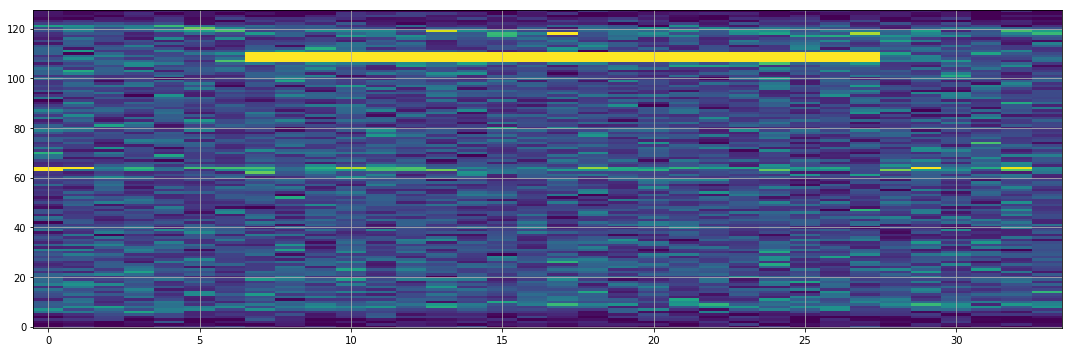

In [32]:
print(f"SNR: {snr(sims['MODEL'], sims['PYHA']):.2f}")
imshow(sims['PYHA'].T)

# Limitations

## Fixed-point
Expects standard FPGA Fixed point format i.e 18 bits (incl. sign) and scaled to -1...1 range.

In [13]:
print(f'Minimum number representabe: {2**-17}')

Minimum number representabe: 7.62939453125e-06


## Average pooling cannot be turned off i.e. setting `avg_freq_axis=1, avg_time_axis=1`
For this case the implementation could be simplified i.e. no need for high-precision fixed-point and read-modify-write.

# Synthesis
`avg_freq_axis` controls the memory usage and decimates the output data rate.

`avg_time_axis` decimates output data rate but has ~no effect on resource usage.

## `avg_freq_axis=8` and `avg_time_axis=4`

In [43]:
dut = Spectrogram(fft_size, avg_freq_axis=8, avg_time_axis=4)
sims = simulate(dut, orig_inp[:4*fft_size], simulations=['PYHA', 'RTL', 'GATE'])

INFO:sim:Converting model to hardware types ...
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Converting simulation inputs to hardware types...
INFO:sim:Running "PYHA" simulation...


100%|██████████| 6178/6178 [00:26<00:00, 233.77it/s]

INFO:sim:OK!
INFO:sim:Running "RTL" simulation...


INFO:conversion:Creating top.vhd ...
INFO:conversion:DataIndexValid to VHDL ...
INFO:conversion:DataIndexValid to VHDL ...
INFO:conversion:MovingAverage to VHDL ...
INFO:conversion:DCRemoval to VHDL ...
INFO:conversion:Packager to VHDL ...
INFO:conversion:Windower to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:StageR2SDF to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:StageR2SDF to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:StageR2SDF to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:StageR2SDF to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:StageR2SDF to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:StageR2SDF to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:StageR2SDF to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:StageR2SDF to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:StageR2SDF to VHD

In [48]:
assert sims_close(sims, rtol=1e-10, atol=1e-10)

INFO:sim:sims_close(rtol=1e-10, atol=1e-10)
INFO:sim:Using "MODEL" as golden output
INFO:sim:MODEL OK!
ERROR:conversion:PYHA(0) 0.000001 != 0.000001 (0.000000)
ERROR:conversion:PYHA(1) 0.000001 != 0.000001 (0.000000)
ERROR:conversion:PYHA(2) 0.000002 != 0.000002 (0.000000)
ERROR:conversion:PYHA(3) 0.000003 != 0.000003 (0.000000)
ERROR:conversion:PYHA(4) 0.000002 != 0.000002 (0.000000)
ERROR:conversion:PYHA(5) 0.000002 != 0.000002 (0.000000)
ERROR:conversion:PYHA(6) 0.000004 != 0.000004 (0.000000)
ERROR:conversion:PYHA(7) 0.000005 != 0.000005 (0.000000)
ERROR:conversion:PYHA(8) 0.000004 != 0.000004 (0.000000)
ERROR:conversion:PYHA(9) 0.000004 != 0.000004 (0.000000)
ERROR:conversion:PYHA(10) 0.000004 != 0.000004 (0.000000)
ERROR:conversion:PYHA(11) 0.000002 != 0.000002 (0.000000)
ERROR:conversion:PYHA(12) 0.000003 != 0.000003 (0.000000)
ERROR:conversion:PYHA(13) 0.000003 != 0.000003 (0.000000)
ERROR:conversion:PYHA(14) 0.000003 != 0.000003 (0.000000)
ERROR:conversion:PYHA(15) 0.000004 !=

ERROR:conversion:RTL(14) 0.000003 != 0.000003 (0.000000)
ERROR:conversion:RTL(15) 0.000004 != 0.000004 (0.000000)
ERROR:conversion:RTL(16) 0.000003 != 0.000003 (0.000000)
ERROR:conversion:RTL(17) 0.000005 != 0.000005 (0.000000)
ERROR:conversion:RTL(18) 0.000004 != 0.000004 (0.000000)
ERROR:conversion:RTL(19) 0.000004 != 0.000004 (0.000000)
ERROR:conversion:RTL(20) 0.000004 != 0.000004 (0.000000)
ERROR:conversion:RTL(21) 0.000004 != 0.000004 (0.000000)
ERROR:conversion:RTL(22) 0.000003 != 0.000003 (0.000000)
ERROR:conversion:RTL(23) 0.000004 != 0.000004 (0.000000)
ERROR:conversion:RTL(24) 0.000003 != 0.000003 (0.000000)
ERROR:conversion:RTL(25) 0.000002 != 0.000002 (0.000000)
ERROR:conversion:RTL(26) 0.000003 != 0.000003 (0.000000)
ERROR:conversion:RTL(27) 0.000004 != 0.000004 (0.000000)
ERROR:conversion:RTL(28) 0.000003 != 0.000003 (0.000000)
ERROR:conversion:RTL(29) 0.000004 != 0.000004 (0.000000)
ERROR:conversion:RTL(30) 0.000003 != 0.000003 (0.000000)
ERROR:conversion:RTL(31) 0.0000

ERROR:conversion:GATE(31) 0.000005 != 0.000005 (0.000000)
ERROR:conversion:GATE(32) 0.000002 != 0.000002 (0.000000)
ERROR:conversion:GATE(33) 0.000004 != 0.000004 (0.000000)
ERROR:conversion:GATE(34) 0.000002 != 0.000002 (0.000000)
ERROR:conversion:GATE(35) 0.000003 != 0.000003 (0.000000)
ERROR:conversion:GATE(36) 0.000003 != 0.000003 (0.000000)
ERROR:conversion:GATE(37) 0.000003 != 0.000003 (0.000000)
ERROR:conversion:GATE(39) 0.000004 != 0.000004 (0.000000)
ERROR:conversion:GATE(40) 0.000003 != 0.000003 (0.000000)
ERROR:conversion:GATE(41) 0.000003 != 0.000003 (0.000000)
ERROR:conversion:GATE(42) 0.000001 != 0.000001 (0.000000)
ERROR:conversion:GATE(43) 0.000004 != 0.000004 (0.000000)
ERROR:conversion:GATE(44) 0.000004 != 0.000004 (0.000000)
ERROR:conversion:GATE(45) 0.000002 != 0.000002 (0.000000)
ERROR:conversion:GATE(46) 0.000003 != 0.000003 (0.000000)
ERROR:conversion:GATE(47) 0.000003 != 0.000003 (0.000000)
ERROR:conversion:GATE(48) 0.000002 != 0.000002 (0.000000)
ERROR:conversi

AssertionError: 

In [49]:
lut, mem, mul = get_resource_usage()
print(f'Logic elements: {lut}')
print(f'Memory: {mem}')
print(f'Multipler (18bit): {mul//2}')

Logic elements: 7670
Memory: 81900
Multipler (18bit): 40
